In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
# data encoding

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 122us/sample - loss: 2.6065 - accuracy: 0.4856 - val_loss: 1.7344 - val_accuracy: 0.6250
Epoch 2/20
7982/7982 [==============================] - 0s 33us/sample - loss: 1.4288 - accuracy: 0.6948 - val_loss: 1.3105 - val_accuracy: 0.7140
Epoch 3/20
7982/7982 [==============================] - 0s 32us/sample - loss: 1.0527 - accuracy: 0.7741 - val_loss: 1.1298 - val_accuracy: 0.7480
Epoch 4/20
7982/7982 [==============================] - 0s 31us/sample - loss: 0.8273 - accuracy: 0.8266 - val_loss: 1.0362 - val_accuracy: 0.7740
Epoch 5/20
7982/7982 [==============================] - 0s 30us/sample - loss: 0.6540 - accuracy: 0.8658 - val_loss: 0.9871 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 0s 31us/sample - loss: 0.5243 - accuracy: 0.8915 - val_loss: 0.9122 - val_accuracy: 0.8130
Epoch 7/20
7982/7982 [==============================] - 0s 31us/sampl

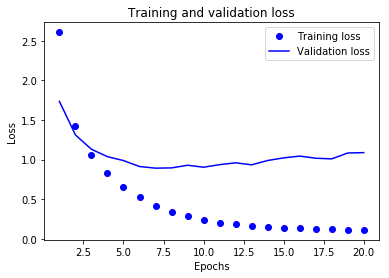

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

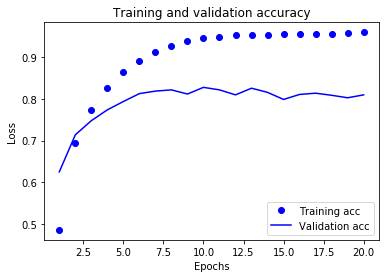

In [13]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 81us/sample - loss: 2.6237 - accuracy: 0.5355 - val_loss: 1.6698 - val_accuracy: 0.6520
Epoch 2/9
7982/7982 [==============================] - 0s 31us/sample - loss: 1.3800 - accuracy: 0.6998 - val_loss: 1.2816 - val_accuracy: 0.7060
Epoch 3/9
7982/7982 [==============================] - 0s 31us/sample - loss: 1.0367 - accuracy: 0.7755 - val_loss: 1.1267 - val_accuracy: 0.7340
Epoch 4/9
7982/7982 [==============================] - 0s 31us/sample - loss: 0.8160 - accuracy: 0.8249 - val_loss: 1.0439 - val_accuracy: 0.7710
Epoch 5/9
7982/7982 [==============================] - 0s 31us/sample - loss: 0.6535 - accuracy: 0.8614 - val_loss: 0.9784 - val_accuracy: 0.7780
Epoch 6/9
7982/7982 [==============================] - 0s 31us/sample - loss: 0.5213 - accuracy: 0.8926 - val_loss: 0.9846 - val_accuracy: 0.7850
Epoch 7/9
7982/7982 [==============================] - 0s 31us/sample - loss

In [15]:
results

[1.0265715619016733, 0.78183436]

In [16]:
# random shuffling yields 18% accuracy compared to ~80% accuracy of the model

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

In [17]:
predictions = model.predict(x_test)

In [18]:
predictions[0].shape

(46,)

In [19]:
np.sum(predictions[0])

0.99999994

In [20]:
np.argmax(predictions[0])

3

In [21]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [22]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [23]:
# test model with significantly smaller number of layers i.e. 4

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 102us/sample - loss: 2.7960 - accuracy: 0.4508 - val_loss: 1.8970 - val_accuracy: 0.6190
Epoch 2/9
7982/7982 [==============================] - 0s 32us/sample - loss: 1.5592 - accuracy: 0.6853 - val_loss: 1.3752 - val_accuracy: 0.7080
Epoch 3/9
7982/7982 [==============================] - 0s 32us/sample - loss: 1.1309 - accuracy: 0.7677 - val_loss: 1.1875 - val_accuracy: 0.7400
Epoch 4/9
7982/7982 [==============================] - 0s 32us/sample - loss: 0.8911 - accuracy: 0.8178 - val_loss: 1.0621 - val_accuracy: 0.7860
Epoch 5/9
7982/7982 [==============================] - 0s 31us/sample - loss: 0.7123 - accuracy: 0.8561 - val_loss: 0.9895 - val_accuracy: 0.8040
Epoch 6/9
7982/7982 [==============================] - 0s 32us/sample - loss: 0.5723 - accuracy: 0.8854 - val_loss: 0.9381 - val_accuracy: 0.8130
Epoch 7/9
7982/7982 [==============================] - 0s 32us/sample - los